<a href="https://colab.research.google.com/github/Caiman419/Carrotcarrot/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 구글 드라이브와 연동하는 코드
from os import path
from google.colab import drive

notebooks_dir_name = '2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트'
drive.mount('/content/gdrive', force_remount=True)
notebook_base_dir = path.join('./gdrive/My Drive', notebooks_dir_name)
if not path.exists(notebook_base_dir):
  print ('error')

Mounted at /content/gdrive


# 1. 필요한 라이브러리 추가

In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2

# 2. 전처리를 통해 두 이미지 데이터셋의 형태 맞추기

1) 손목이 오른쪽에 있는 크기 300*200 데이터셋
https://www.kaggle.com/drgfreeman/rockpaperscissors

2) 손목이 아래쪽에 있는 크기 300*300 데이터셋
https://www.kaggle.com/sanikamal/rock-paper-scissors-dataset

손목은 아래쪽, 크기는 200*300으로 맞추는 코드

In [ ]:
# 이미지를 흑백으로 불러오는 코드
def loadimage(folder):
  images = []
  cnt=0
  print("start")
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
    if img is not None:
      images.append(img)
      cnt += 1
      if cnt %100==0:
        print("100")
  return images

In [6]:
# 이미지 크기를 유지하고 회전시키는 코드
# https://stackoverrun.com/ko/q/3142825
def rotateAndScale(img, scaleFactor, degreesCCW): 
  (oldY,oldX) = (img.shape[0],img.shape[1])
  M = cv2.getRotationMatrix2D(center=(oldX/2,oldY/2), angle=degreesCCW, scale=scaleFactor)

  newX,newY = oldX*scaleFactor,oldY*scaleFactor 
  r = np.deg2rad(degreesCCW) 
  newX,newY = (abs(np.sin(r)*newY) + abs(np.cos(r)*newX),abs(np.sin(r)*newX) + abs(np.cos(r)*newY)) 

  (tx,ty) = ((newX-oldX)/2,(newY-oldY)/2) 
  M[0,2] += tx 
  M[1,2] += ty 

  rotatedImg = cv2.warpAffine(img, M, dsize=(int(newX),int(newY))) 
  return rotatedImg 

def rot(load_path, save_path):
  images = loadimage(load_path)
  # i = 0
  i = 1000
  for img in images:
    height, width, channel = img.shape
    dst=rotateAndScale(img, 1, 270)
    cv2.imwrite(save_path + "/%d.png" % i, dst)
    i+=1

In [ ]:
rot('/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/archive/rock', '/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/dataset/r')
rot('/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/archive/scissors', '/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/dataset/s')
rot('/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/archive/paper', '/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/dataset/p')

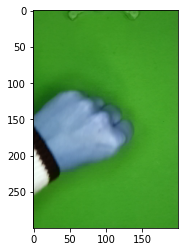

In [ ]:
plt.figure()
plt.imshow(rock_1[0])
plt.show()

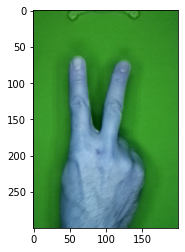

In [ ]:
plt.figure()
plt.imshow(scissors_1[0])
plt.show()

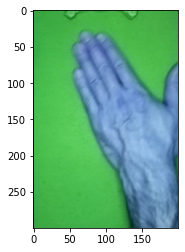

In [ ]:
plt.figure()
plt.imshow(paper_1[0])
plt.show()

In [ ]:
# 크기 조절 코드
def crop(load_path, save_path):
  images = loadimage(load_path)
  i = 0
  for img in images:
    dst = img.copy() 
    dst = img[0:300, 50:250]
    cv2.imwrite(save_path + "/%d.png" % i, dst)
    i+=1

In [ ]:
crop('/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/archive(1)/rock', '/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/dataset/r')
crop('/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/archive(1)/scissors', '/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/dataset/s')
crop('/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/archive(1)/paper', '/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/dataset/p')

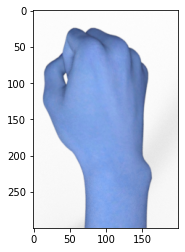

In [ ]:
plt.figure()
plt.imshow(rock_2[0])
plt.show()

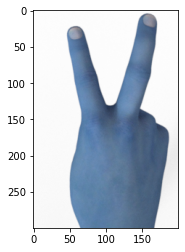

In [ ]:
plt.figure()
plt.imshow(scissors_2[0])
plt.show()

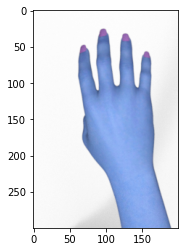

In [ ]:
plt.figure()
plt.imshow(paper_2[0])
plt.show()

# 3. 추가 전처리 및 모델 학습

참고 코드: https://www.tensorflow.org/tutorials/keras/classification?hl=ko

In [7]:
rock=loadimage('/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/dataset/r')

start
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


In [31]:
scissors=loadimage('/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/dataset/s')

start
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


In [9]:
paper=loadimage('/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/dataset/p')

start
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


In [42]:
x_total = []
y_total = []
class_names = ['rock', 'scissors', 'paper']

for r in rock:
  x_total.append(r)
  y_total.append(0)
for s in scissors:
  x_total.append(s)
  y_total.append(1)
for p in paper:
  x_total.append(p)
  y_total.append(2)

kernel_size = 3
kernel1 = np.ones((3, 3), np.uint8)
kernel2 = np.ones((5, 5), np.uint8)

x_bin=[]
for x in x_total:
  # 이진화
  # ret, img = cv2.threshold(x, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  # 경계선
  img = cv2.Laplacian(x, -1, ksize=kernel_size)
  
  # Open
  # img2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel1)

  # Close
  # img3 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel2)
  if img is not None:
               x_bin.append(img)


x_total=np.array(x_bin)
y_total=np.array(y_total)

#x_total.shape
#y_total.shape

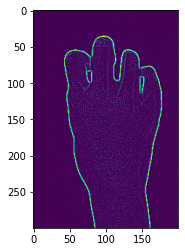

In [48]:
plt.figure()
plt.imshow(x_bin[14])
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_total, y_total, test_size=0.4, shuffle=True, random_state=1004)

# X_train.shape

X_train = X_train / 255.0

X_test = X_test / 255.0

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(300, 200)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [45]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
96/96 [==============================] - 1s 6ms/step - loss: 0.5901 - accuracy: 0.7539
Epoch 2/5
96/96 [==============================] - 1s 6ms/step - loss: 0.1348 - accuracy: 0.9636
Epoch 3/5
96/96 [==============================] - 1s 6ms/step - loss: 0.0492 - accuracy: 0.9912
Epoch 4/5
96/96 [==============================] - 1s 6ms/step - loss: 0.0155 - accuracy: 0.9993
Epoch 5/5
96/96 [==============================] - 1s 6ms/step - loss: 0.0075 - accuracy: 1.0000


In [47]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

64/64 - 0s - loss: 0.2168 - accuracy: 0.9302

테스트 정확도: 0.9302211403846741


In [38]:
predictions = model.predict(X_test)

In [320]:
np.argmax(predictions[0])

0

In [321]:
y_test[0]

0

# 4. Colab에서 Pycharm으로 옮기기 위해 model 저장

참고 코드: https://www.tensorflow.org/guide/keras/save_and_serialize?hl=ko

In [16]:
model.save('/content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/my_model_4')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/2020년도 3학년 2학기/게임인공지능/당근당근 프로젝트/my_model_4/assets


# 5. 전처리에 따른 결과 차이

## 1) 이진화
64/64 - 0s - loss: 0.4025 - accuracy: 0.9012 테스트 정확도: 0.9012284874916077

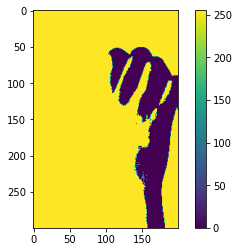

In [39]:
plt.figure()
plt.imshow(x_total[0])
plt.colorbar()
plt.grid(False)
plt.show()

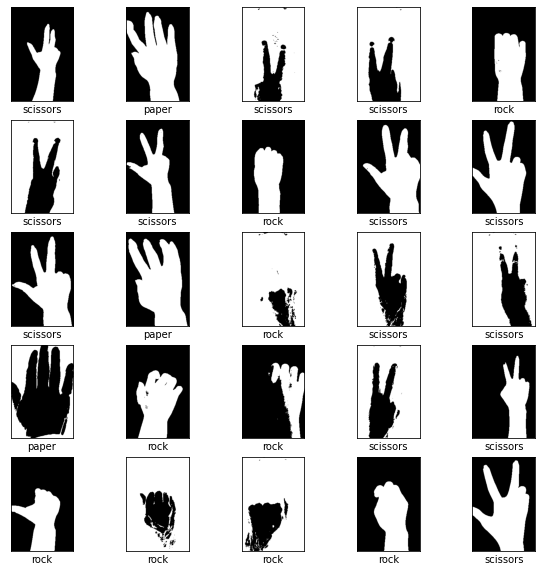

In [40]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

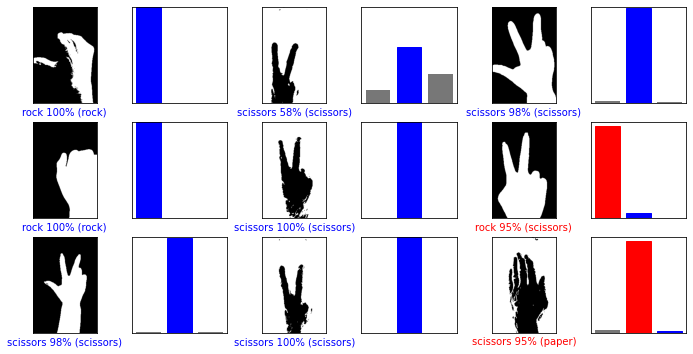

In [41]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

## 2) 경계선
64/64 - 0s - loss: 0.2168 - accuracy: 0.9302 테스트 정확도: 0.9302211403846741

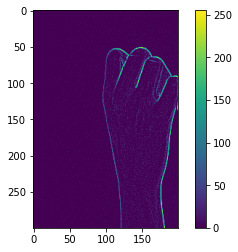

In [ ]:


plt.figure()
plt.imshow(x_total[0])
plt.colorbar()
plt.grid(False)
plt.show()

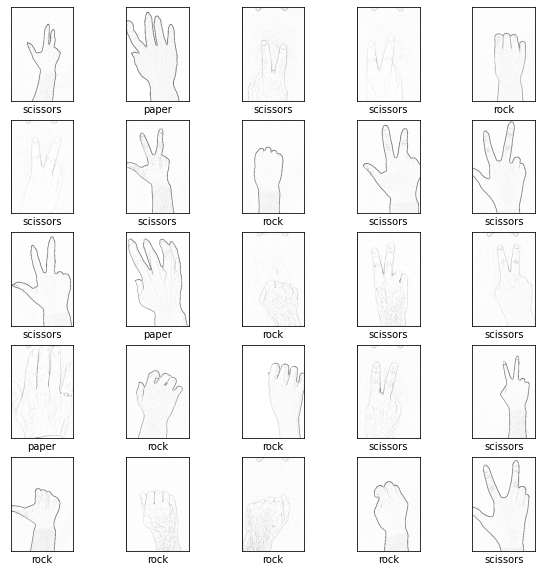

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

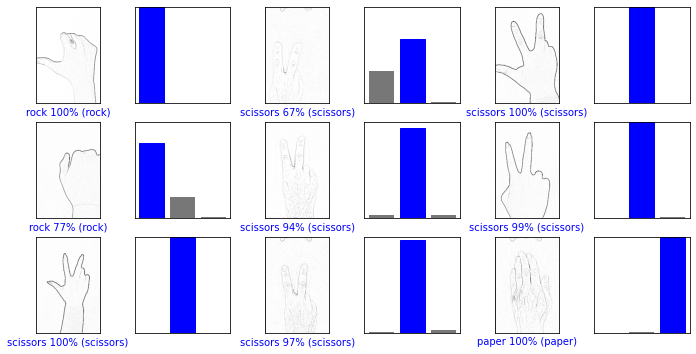

In [ ]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()